In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


In [2]:
## Data Understanding and Preparation

In [3]:
#Read data 
train_data = pd.read_csv('C:/Users/www.abcom.in/Downloads/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.shape

(1460, 81)

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#Dropping columns with maximum missing values
train_data = train_data.drop(columns  =['Alley','PoolQC','Fence','MiscFeature'])

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
train_data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [11]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [12]:
#Replace Nan values of FireplaceQu with NA
train_data.FireplaceQu=train_data.FireplaceQu.fillna('NA')

In [13]:
#Check unique values of LotFrontage
train_data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [14]:
#check median of LotFrontage
LotFrontage_median = train_data.LotFrontage.median()
LotFrontage_median

69.0

In [15]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
train_data.LotFrontage = train_data.LotFrontage.fillna(LotFrontage_median)

In [16]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
masvnrarea_median =  train_data.MasVnrArea.median()
train_data.MasVnrArea = train_data.MasVnrArea.fillna(masvnrarea_median)    

In [17]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
train_data.MasVnrType = train_data.MasVnrType.fillna('None')

In [18]:
#replace Nan values of BsmtQual with NA i.e. No Basement
train_data.BsmtQual = train_data.BsmtQual.fillna('NA')

In [19]:
#replace Nan values of BsmtCond with NA i.e. No Basement
train_data.BsmtCond = train_data.BsmtCond.fillna('NA')

In [20]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
train_data.BsmtExposure = train_data.BsmtExposure.fillna('No')

In [21]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
train_data.BsmtFinType1 = train_data.BsmtFinType1.fillna('NA')

In [22]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
train_data.BsmtFinType2 = train_data.BsmtFinType2.fillna('NA')

In [23]:
#impute missing values of Electrical with mode due to categorical column
train_data.Electrical = train_data.Electrical.fillna(train_data.Electrical.mode()[0])    

In [24]:
#replace Nan values of GarageType with NA i.e. No Garage
train_data.GarageType = train_data.GarageType.fillna('NA')

In [25]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(0)

In [26]:
#replace Nan values of GarageFinish with NA i.e. No Garage
train_data.GarageFinish = train_data.GarageFinish.fillna('NA')

In [27]:
#replace Nan values of GarageQual with NA i.e. No Garage
train_data.GarageQual = train_data.GarageQual.fillna('NA')

In [28]:
#replace Nan values of GarageFinish with NA i.e. No Garage
train_data.GarageQual = train_data.GarageQual.fillna('NA')

In [29]:
#replace Nan values of GarageCond with NA i.e. No Garage
train_data.GarageCond = train_data.GarageCond.fillna('NA')

In [30]:
#check missing values again
train_data.isnull().sum()[train_data.isnull().sum()>0]

Series([], dtype: int64)

In [31]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
train_data['HouseAge'] = train_data.YrSold - train_data.YearBuilt

In [32]:
#Drop YrSold, YearBuilt after HouseAge
train_data=train_data.drop(columns=['YrSold', 'YearBuilt'])

In [33]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
train_data = train_data.astype(convert_dict)

In [34]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
train_data = train_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [35]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
train_data = train_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [36]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
train_data = train_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [37]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
train_data = train_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [38]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
train_data = train_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [39]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
train_data = train_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [40]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
train_data = train_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [41]:
train_data.ExterQual.value_counts()

ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [43]:
for c in train_data.columns:
    if train_data[c].dtype == object :
        print(c)
        print(train_data[c].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [44]:
#Drop columns which have moe than 80% bias data
train_data=train_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [46]:
#Get all object type columns
object_columns = []
for c in train_data.columns:
    if train_data[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


In [47]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(train_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main train_data df
train_data = pd.concat([train_data,MSSubClass_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [48]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(train_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [49]:
#concat MSZoning_df with main train_data df
train_data = pd.concat([train_data,MSZoning_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [50]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(train_data['LotShape'],drop_first=True, prefix='LotShape')

In [51]:
#concat LotShape_df with main train_data df
train_data = pd.concat([train_data,LotShape_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [52]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(train_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [53]:
#concat LotConfig_df with main train_data df
train_data = pd.concat([train_data,LotConfig_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [54]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(train_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main train_data df
train_data = pd.concat([train_data,Neighborhood_df],axis=1)
train_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [55]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(train_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main train_data df
train_data = pd.concat([train_data,HouseStyle_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False

In [56]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(train_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main train_data df
train_data = pd.concat([train_data,RoofStyle_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PCon

In [57]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(train_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main train_data df
train_data = pd.concat([train_data,Exterior1st_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,

In [58]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(train_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main train_data df
train_data = pd.concat([train_data,Exterior2nd_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [59]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(train_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main train_data df
train_data = pd.concat([train_data,MasVnrType_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False

In [60]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(train_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main train_data df
train_data = pd.concat([train_data,Foundation_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkF

In [61]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(train_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main train_data df
train_data = pd.concat([train_data,GarageType_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [62]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(train_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main train_data df
train_data = pd.concat([train_data,GarageFinish_df],axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,

In [63]:
train_data.shape

(1460, 162)

In [64]:
#Drop categorical variables after ceating dummy varaibles
train_data=train_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(107), float64(3), int64(39)
memory usage: 631.7 KB


In [66]:
df_train,df_test = train_test_split(train_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [67]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,448.165524,50.087169,563.745348,1061.998041,4.150833,1168.611166,343.540646,5.999021,1518.150833,0.439765,0.059745,1.567091,0.377081,2.856024,1.053869,3.511263,6.504407,0.598433,1.798237,1868.316357,1.771792,471.995103,92.641528,47.035260,23.241920,3.940255,14.047013,2.149853,48.711068,6.288932,180609.596474,36.497551
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,465.115135,170.847470,448.739203,459.098042,0.974565,397.896911,435.498994,48.207914,531.849898,0.525381,0.241230,0.551872,0.500807,0.819993,0.230169,0.659114,1.605514,0.645769,1.825859,455.160037,0.746119,212.213075,124.479090,66.195468,63.167621,32.333667,51.081766,34.524133,578.364428,2.748576,79099.444132,30.346064
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,216.000000,793.000000,3.000000,876.000000,0.000000,0.000000,1135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129500.000000,8.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,392.000000,0.000000,462.000000,994.000000,5.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,161000.000000,34.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,712.000000,0.000000,806.000000,1314.000000,5.000000,1422.000000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,54.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,5644.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,5.000000,2010.000000,4.000000,1418.000000,857.000000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,12.000000,755000.000000,136.000000


In [68]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,Fals

In [69]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,-3.270863e-16,0.000000,-6.350345e-17,-1.130883e-17,-5.915390e-17,4.871498e-17,-5.219462e-18,6.611318e-17,4.784507e-17,-3.479641e-18,3.862402e-16,3.070783e-16,-2.392253e-16,9.395031e-17,-2.435749e-17,2.296563e-16,7.481229e-17,-9.569013e-17,-4.523534e-17,-7.133264e-17,5.306453e-17,-2.087785e-17,-3.479641e-18,0.000000,-1.391856e-17,5.567426e-17,180609.596474,-9.742995e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,79099.444132,1.000490e+00
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,-3.234651e+00,-2.003035,-7.892303e-01,-1.245016e-01,-2.031927e+00,-8.374505e-01,-2.477915e-01,-2.840982e+00,-7.533165e-01,-3.484694e+00,-2.341549e-01,-2.293993e+00,-2.183802e+00,-9.271528e-01,-9.853544e-01,-4.106758e+00,-2.375841e+00,-2.225247e+00,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.925187e+00,34900.000000,-1.203301e+00
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,-1.181447e+00,-0.735755,-7.892303e-01,-1.245016e-01,-7.207646e-01,-8.374505e-01,-2.477915e-01,-1.028080e+00,-7.533165e-01,-1.044452e+00,-2.341549e-01,-7.760625e-01,-9.374844e-01,-9.271528e-01,-9.853544e-01,1.971342e-01,-1.034916e+00,-6.694436e-01,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-8.331783e-01,129500.000000,-9.395458e-01
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,8.717571e-01,-0.207721,-7.892303e-01,-1.245016e-01,-9.810360e-02,-8.374505e-01,-2.477915e-01,7.848212e-01,-7.533165e-01,1.756687e-01,-2.341549e-01,-7.760625e-01,-3.143258e-01,6.221483e-01,1.105572e-01,2.410963e-01,3.060094e-01,3.773952e-02,-7.445984e-01,-3.179307e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.051723e-01,161000.000000,-8.234265e-02
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,5.6752

In [70]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [71]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

In [73]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [74]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 66),
 ('LotArea', False, 87),
 ('OverallQual', True, 1),
 ('OverallCond', False, 11),
 ('YearRemodAdd', False, 107),
 ('MasVnrArea', False, 70),
 ('ExterQual', False, 4),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 59),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinSF2', False, 20),
 ('BsmtUnfSF', False, 17),
 ('TotalBsmtSF', False, 19),
 ('HeatingQC', False, 111),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', False, 8),
 ('BsmtFullBath', False, 27),
 ('BsmtHalfBath', False, 100),
 ('FullBath', False, 81),
 ('HalfBath', False, 96),
 ('BedroomAbvGr', False, 76),
 ('KitchenAbvGr', False, 80),
 ('KitchenQual', False, 94),
 ('TotRmsAbvGrd', False, 97),
 ('Fireplaces', False, 102),
 ('FireplaceQu', False, 46),
 ('GarageYrBlt', False, 39),
 ('GarageCars', True, 1),
 ('GarageArea', False, 75),
 ('WoodDeckSF', False, 105),
 ('OpenPorchSF', False, 114),
 ('EnclosedPorch', False, 106),
 ('3SsnPorch', F

In [75]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'GarageType_NA', 'GarageFinish_NA'], dtype='object')

In [76]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_PConc', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=113)

In [77]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [78]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [81]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()  #Running the linear Model

In [82]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:19:45   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     986   BIC:                         2.436e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2370.639     70.075      0.000    1.61e+05    1.71e+05
OverallQual           2.178e+04   1818.685     11.975      0.000    1.82e+04    2.53e+04
BsmtQual              9679.8044   1752.771      5.523      0.000    6240.214    1.31e+04
BsmtExposure          1.112e+04   1265.628      8.789      0.000    8639.849    1.36e+04
1stFlrSF              2.282e+04   1565.516     14.580      0.000    1.98e+04    2.59e+04
2ndFlrSF              2.859e+04   2082.243     13.732      0.000    2.45e+04    3.27e+04
GarageCars            1.121e+04   1706.148      6.573      0.000    7866.403    1.46e+04
MSSubClass_45        -2.583e+04   2.59e+04     -0.996      0.319   -7.67e+04     2.5e+04
MSSubClass_90        -2.831e+04   6012.985     -4.708      0.000   -4.01e+04   -1.65e+04
MSSubClass_160       -1.605e+04   5430.235     -2.956      0.003   -2.67e+04   -5393.814
MSSubClass_180        -1.86e+04   1.52e+04     -1.225      0.221   -4.84e+04    1.12e+04
MSSubClass_190       -1.942e+04   7145.207     -2.718      0.007   -3.34e+04   -5399.133
LotShape_IR3         -2.693e+04   1.14e+04     -2.370      0.018   -4.92e+04   -4632.755
LotConfig_FR3        -1.764e+04   1.94e+04     -0.911      0.363   -5.56e+04    2.04e+04
Neighborhood_ClearCr  1.519e+04   7794.469      1.949      0.052    -101.177    3.05e+04
Neighborhood_Crawfor   2.99e+04   6260.718      4.776      0.000    1.76e+04    4.22e+04
Neighborhood_Edwards -9220.3530   4219.429     -2.185      0.029   -1.75e+04    -940.259
Neighborhood_NoRidge  5.452e+04   6471.627      8.424      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.323e+04   5075.893      8.517      0.000    3.33e+04    5.32e+04
Neighborhood_Veenker  2.027e+04   1.05e+04      1.938      0.053    -257.270    4.08e+04
HouseStyle_1.5Unf     2.777e+04    2.4e+04      1.155      0.248   -1.94e+04    7.49e+04
HouseStyle_1Story     2.245e+04   3931.748      5.710      0.000    1.47e+04    3.02e+04
HouseStyle_2.5Fin    -2.605e+04   1.71e+04     -1.521      0.129   -5.97e+04    7569.113
Exterior1st_AsphShn   1.361e+04   3.46e+04      0.394      0.694   -5.42e+04    8.15e+04
Exterior1st_CemntBd   -1.85e+04   2.38e+04     -0.778      0.437   -6.51e+04    2.81e+04
Exterior1st_ImStucc  -3.115e+04   3.39e+04     -0.918      0.359   -9.77e+04    3.54e+04
Exterior1st_Stone    -2.729e+04   2.64e+04     -1.034      0.301   -7.91e+04    2.45e+04
Exterior1st_WdShing   1.812e+04   9090.681      1.993      0.047     279.083     3.6e+04
Exterior2nd_BrkFace   2.196e+04   8765.265      2.505      0.012    4759.111    3.92e+04
Exterior2nd_CmentBd   2.831e+04   2.38e+04      1.188      0.235   -1.84e+04    7.51e+04
Exterior2nd_Stone     3.153e+04   2.18e+04      1.445      0.149   -1.13e+04    7.44e+04
Exterior2nd_Stucco    -2.92e+04   7764.075     -3.762    

In [84]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

In [88]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [89]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'GarageFinish_NA'], dtype='object')

In [90]:
X_train_lm = sm.add_constant(X_train_new)

In [92]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [93]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:25:33   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     986   BIC:                         2.436e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2370.639     70.075      0.000    1.61e+05    1.71e+05
OverallQual           2.178e+04   1818.685     11.975      0.000    1.82e+04    2.53e+04
BsmtQual              9679.8044   1752.771      5.523      0.000    6240.214    1.31e+04
BsmtExposure          1.112e+04   1265.628      8.789      0.000    8639.849    1.36e+04
1stFlrSF              2.282e+04   1565.516     14.580      0.000    1.98e+04    2.59e+04
2ndFlrSF              2.859e+04   2082.243     13.732      0.000    2.45e+04    3.27e+04
GarageCars            1.121e+04   1706.148      6.573      0.000    7866.403    1.46e+04
MSSubClass_45        -2.583e+04   2.59e+04     -0.996      0.319   -7.67e+04     2.5e+04
MSSubClass_90        -2.831e+04   6012.985     -4.708      0.000   -4.01e+04   -1.65e+04
MSSubClass_160       -1.605e+04   5430.235     -2.956      0.003   -2.67e+04   -5393.814
MSSubClass_180        -1.86e+04   1.52e+04     -1.225      0.221   -4.84e+04    1.12e+04
MSSubClass_190       -1.942e+04   7145.207     -2.718      0.007   -3.34e+04   -5399.133
LotShape_IR3         -2.693e+04   1.14e+04     -2.370      0.018   -4.92e+04   -4632.755
LotConfig_FR3        -1.764e+04   1.94e+04     -0.911      0.363   -5.56e+04    2.04e+04
Neighborhood_ClearCr  1.519e+04   7794.469      1.949      0.052    -101.177    3.05e+04
Neighborhood_Crawfor   2.99e+04   6260.718      4.776      0.000    1.76e+04    4.22e+04
Neighborhood_Edwards -9220.3530   4219.429     -2.185      0.029   -1.75e+04    -940.259
Neighborhood_NoRidge  5.452e+04   6471.627      8.424      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.323e+04   5075.893      8.517      0.000    3.33e+04    5.32e+04
Neighborhood_Veenker  2.027e+04   1.05e+04      1.938      0.053    -257.270    4.08e+04
HouseStyle_1.5Unf     2.777e+04    2.4e+04      1.155      0.248   -1.94e+04    7.49e+04
HouseStyle_1Story     2.245e+04   3931.748      5.710      0.000    1.47e+04    3.02e+04
HouseStyle_2.5Fin    -2.605e+04   1.71e+04     -1.521      0.129   -5.97e+04    7569.113
Exterior1st_AsphShn   1.361e+04   3.46e+04      0.394      0.694   -5.42e+04    8.15e+04
Exterior1st_CemntBd   -1.85e+04   2.38e+04     -0.778      0.437   -6.51e+04    2.81e+04
Exterior1st_ImStucc  -3.115e+04   3.39e+04     -0.918      0.359   -9.77e+04    3.54e+04
Exterior1st_Stone    -2.729e+04   2.64e+04     -1.034      0.301   -7.91e+04    2.45e+04
Exterior1st_WdShing   1.812e+04   9090.681      1.993      0.047     279.083     3.6e+04
Exterior2nd_BrkFace   2.196e+04   8765.265      2.505      0.012    4759.111    3.92e+04
Exterior2nd_CmentBd   2.831e+04   2.38e+04      1.188      0.235   -1.84e+04    7.51e+04
Exterior2nd_Stone     3.153e+04   2.18e+04      1.445      0.149   -1.13e+04    7.44e+04
Exterior2nd_Stucco    -2.92e+04   7764.075     -3.762    

In [94]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [95]:
X_train_lm = sm.add_constant(X_train_new)

In [97]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [98]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:26:16   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     987   BIC:                         2.436e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2369.025     70.113      0.000    1.61e+05    1.71e+05
OverallQual           2.185e+04   1809.436     12.075      0.000    1.83e+04    2.54e+04
BsmtQual              9565.7389   1727.932      5.536      0.000    6174.897     1.3e+04
BsmtExposure          1.112e+04   1265.039      8.790      0.000    8636.711    1.36e+04
1stFlrSF              2.284e+04   1564.416     14.599      0.000    1.98e+04    2.59e+04
2ndFlrSF              2.859e+04   2081.350     13.737      0.000    2.45e+04    3.27e+04
GarageCars            1.122e+04   1705.340      6.580      0.000    7874.363    1.46e+04
MSSubClass_45        -2.592e+04   2.59e+04     -1.000      0.317   -7.68e+04    2.49e+04
MSSubClass_90        -2.801e+04   5962.304     -4.698      0.000   -3.97e+04   -1.63e+04
MSSubClass_160       -1.602e+04   5427.378     -2.952      0.003   -2.67e+04   -5369.500
MSSubClass_180       -1.846e+04   1.52e+04     -1.217      0.224   -4.82e+04    1.13e+04
MSSubClass_190       -1.948e+04   7140.513     -2.728      0.006   -3.35e+04   -5468.559
LotShape_IR3          -2.69e+04   1.14e+04     -2.368      0.018   -4.92e+04   -4611.280
LotConfig_FR3        -1.768e+04   1.94e+04     -0.914      0.361   -5.57e+04    2.03e+04
Neighborhood_ClearCr   1.52e+04   7791.111      1.951      0.051     -87.399    3.05e+04
Neighborhood_Crawfor  2.991e+04   6257.993      4.779      0.000    1.76e+04    4.22e+04
Neighborhood_Edwards -9083.9652   4203.391     -2.161      0.031   -1.73e+04    -835.355
Neighborhood_NoRidge  5.451e+04   6468.848      8.427      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.325e+04   5073.396      8.525      0.000    3.33e+04    5.32e+04
Neighborhood_Veenker  2.032e+04   1.05e+04      1.943      0.052    -200.704    4.08e+04
HouseStyle_1.5Unf      2.78e+04    2.4e+04      1.157      0.248   -1.93e+04    7.49e+04
HouseStyle_1Story     2.248e+04   3929.509      5.720      0.000    1.48e+04    3.02e+04
HouseStyle_2.5Fin    -2.606e+04   1.71e+04     -1.521      0.129   -5.97e+04    7554.105
Exterior1st_CemntBd  -1.852e+04   2.38e+04     -0.780      0.436   -6.51e+04    2.81e+04
Exterior1st_ImStucc  -3.121e+04   3.39e+04     -0.921      0.358   -9.77e+04    3.53e+04
Exterior1st_Stone    -2.725e+04   2.64e+04     -1.033      0.302    -7.9e+04    2.45e+04
Exterior1st_WdShing   1.811e+04   9086.777      1.993      0.047     280.914    3.59e+04
Exterior2nd_BrkFace   2.187e+04   8758.412      2.497      0.013    4680.749    3.91e+04
Exterior2nd_CmentBd   2.832e+04   2.38e+04      1.189      0.235   -1.84e+04    7.51e+04
Exterior2nd_Stone     3.125e+04   2.18e+04      1.433      0.152   -1.15e+04     7.4e+04
Exterior2nd_Stucco   -2.928e+04   7758.129     -3.775      0.000   -4.45e+04   -1.41e+04
Exterior2nd_Wd Shng  -2.758e+04   7303.506     -3.777    

In [99]:
X_train_new.shape

(1021, 34)

In [102]:
X_train_lm = sm.add_constant(X_train_new)

In [104]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [105]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:26:37   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     987   BIC:                         2.436e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2369.025     70.113      0.000    1.61e+05    1.71e+05
OverallQual           2.185e+04   1809.436     12.075      0.000    1.83e+04    2.54e+04
BsmtQual              9565.7389   1727.932      5.536      0.000    6174.897     1.3e+04
BsmtExposure          1.112e+04   1265.039      8.790      0.000    8636.711    1.36e+04
1stFlrSF              2.284e+04   1564.416     14.599      0.000    1.98e+04    2.59e+04
2ndFlrSF              2.859e+04   2081.350     13.737      0.000    2.45e+04    3.27e+04
GarageCars            1.122e+04   1705.340      6.580      0.000    7874.363    1.46e+04
MSSubClass_45        -2.592e+04   2.59e+04     -1.000      0.317   -7.68e+04    2.49e+04
MSSubClass_90        -2.801e+04   5962.304     -4.698      0.000   -3.97e+04   -1.63e+04
MSSubClass_160       -1.602e+04   5427.378     -2.952      0.003   -2.67e+04   -5369.500
MSSubClass_180       -1.846e+04   1.52e+04     -1.217      0.224   -4.82e+04    1.13e+04
MSSubClass_190       -1.948e+04   7140.513     -2.728      0.006   -3.35e+04   -5468.559
LotShape_IR3          -2.69e+04   1.14e+04     -2.368      0.018   -4.92e+04   -4611.280
LotConfig_FR3        -1.768e+04   1.94e+04     -0.914      0.361   -5.57e+04    2.03e+04
Neighborhood_ClearCr   1.52e+04   7791.111      1.951      0.051     -87.399    3.05e+04
Neighborhood_Crawfor  2.991e+04   6257.993      4.779      0.000    1.76e+04    4.22e+04
Neighborhood_Edwards -9083.9652   4203.391     -2.161      0.031   -1.73e+04    -835.355
Neighborhood_NoRidge  5.451e+04   6468.848      8.427      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.325e+04   5073.396      8.525      0.000    3.33e+04    5.32e+04
Neighborhood_Veenker  2.032e+04   1.05e+04      1.943      0.052    -200.704    4.08e+04
HouseStyle_1.5Unf      2.78e+04    2.4e+04      1.157      0.248   -1.93e+04    7.49e+04
HouseStyle_1Story     2.248e+04   3929.509      5.720      0.000    1.48e+04    3.02e+04
HouseStyle_2.5Fin    -2.606e+04   1.71e+04     -1.521      0.129   -5.97e+04    7554.105
Exterior1st_CemntBd  -1.852e+04   2.38e+04     -0.780      0.436   -6.51e+04    2.81e+04
Exterior1st_ImStucc  -3.121e+04   3.39e+04     -0.921      0.358   -9.77e+04    3.53e+04
Exterior1st_Stone    -2.725e+04   2.64e+04     -1.033      0.302    -7.9e+04    2.45e+04
Exterior1st_WdShing   1.811e+04   9086.777      1.993      0.047     280.914    3.59e+04
Exterior2nd_BrkFace   2.187e+04   8758.412      2.497      0.013    4680.749    3.91e+04
Exterior2nd_CmentBd   2.832e+04   2.38e+04      1.189      0.235   -1.84e+04    7.51e+04
Exterior2nd_Stone     3.125e+04   2.18e+04      1.433      0.152   -1.15e+04     7.4e+04
Exterior2nd_Stucco   -2.928e+04   7758.129     -3.775      0.000   -4.45e+04   -1.41e+04
Exterior2nd_Wd Shng  -2.758e+04   7303.506     -3.777    

In [107]:
X_train_lm = sm.add_constant(X_train_new)

In [110]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [111]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:26:53   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     987   BIC:                         2.436e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2369.025     70.113      0.000    1.61e+05    1.71e+05
OverallQual           2.185e+04   1809.436     12.075      0.000    1.83e+04    2.54e+04
BsmtQual              9565.7389   1727.932      5.536      0.000    6174.897     1.3e+04
BsmtExposure          1.112e+04   1265.039      8.790      0.000    8636.711    1.36e+04
1stFlrSF              2.284e+04   1564.416     14.599      0.000    1.98e+04    2.59e+04
2ndFlrSF              2.859e+04   2081.350     13.737      0.000    2.45e+04    3.27e+04
GarageCars            1.122e+04   1705.340      6.580      0.000    7874.363    1.46e+04
MSSubClass_45        -2.592e+04   2.59e+04     -1.000      0.317   -7.68e+04    2.49e+04
MSSubClass_90        -2.801e+04   5962.304     -4.698      0.000   -3.97e+04   -1.63e+04
MSSubClass_160       -1.602e+04   5427.378     -2.952      0.003   -2.67e+04   -5369.500
MSSubClass_180       -1.846e+04   1.52e+04     -1.217      0.224   -4.82e+04    1.13e+04
MSSubClass_190       -1.948e+04   7140.513     -2.728      0.006   -3.35e+04   -5468.559
LotShape_IR3          -2.69e+04   1.14e+04     -2.368      0.018   -4.92e+04   -4611.280
LotConfig_FR3        -1.768e+04   1.94e+04     -0.914      0.361   -5.57e+04    2.03e+04
Neighborhood_ClearCr   1.52e+04   7791.111      1.951      0.051     -87.399    3.05e+04
Neighborhood_Crawfor  2.991e+04   6257.993      4.779      0.000    1.76e+04    4.22e+04
Neighborhood_Edwards -9083.9652   4203.391     -2.161      0.031   -1.73e+04    -835.355
Neighborhood_NoRidge  5.451e+04   6468.848      8.427      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.325e+04   5073.396      8.525      0.000    3.33e+04    5.32e+04
Neighborhood_Veenker  2.032e+04   1.05e+04      1.943      0.052    -200.704    4.08e+04
HouseStyle_1.5Unf      2.78e+04    2.4e+04      1.157      0.248   -1.93e+04    7.49e+04
HouseStyle_1Story     2.248e+04   3929.509      5.720      0.000    1.48e+04    3.02e+04
HouseStyle_2.5Fin    -2.606e+04   1.71e+04     -1.521      0.129   -5.97e+04    7554.105
Exterior1st_CemntBd  -1.852e+04   2.38e+04     -0.780      0.436   -6.51e+04    2.81e+04
Exterior1st_ImStucc  -3.121e+04   3.39e+04     -0.921      0.358   -9.77e+04    3.53e+04
Exterior1st_Stone    -2.725e+04   2.64e+04     -1.033      0.302    -7.9e+04    2.45e+04
Exterior1st_WdShing   1.811e+04   9086.777      1.993      0.047     280.914    3.59e+04
Exterior2nd_BrkFace   2.187e+04   8758.412      2.497      0.013    4680.749    3.91e+04
Exterior2nd_CmentBd   2.832e+04   2.38e+04      1.189      0.235   -1.84e+04    7.51e+04
Exterior2nd_Stone     3.125e+04   2.18e+04      1.433      0.152   -1.15e+04     7.4e+04
Exterior2nd_Stucco   -2.928e+04   7758.129     -3.775      0.000   -4.45e+04   -1.41e+04
Exterior2nd_Wd Shng  -2.758e+04   7303.506     -3.777    

In [112]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [113]:
X_train_lm = sm.add_constant(X_train_new)

In [115]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [116]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:27:02   Log-Likelihood:                -12061.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     988   BIC:                         2.435e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2368.525     70.124      0.000    1.61e+05    1.71e+05
OverallQual            2.19e+04   1807.770     12.116      0.000    1.84e+04    2.54e+04
BsmtQual              9588.0917   1727.352      5.551      0.000    6198.392     1.3e+04
BsmtExposure          1.116e+04   1263.726      8.831      0.000    8679.720    1.36e+04
1stFlrSF              2.282e+04   1563.830     14.590      0.000    1.97e+04    2.59e+04
2ndFlrSF              2.857e+04   2080.785     13.731      0.000    2.45e+04    3.27e+04
GarageCars            1.121e+04   1704.962      6.576      0.000    7865.999    1.46e+04
MSSubClass_45         -2.59e+04   2.59e+04     -1.000      0.318   -7.67e+04    2.49e+04
MSSubClass_90        -2.796e+04   5960.771     -4.691      0.000   -3.97e+04   -1.63e+04
MSSubClass_160       -1.607e+04   5425.861     -2.962      0.003   -2.67e+04   -5426.437
MSSubClass_180       -1.899e+04   1.52e+04     -1.253      0.211   -4.87e+04    1.08e+04
MSSubClass_190       -1.942e+04   7138.691     -2.721      0.007   -3.34e+04   -5412.692
LotShape_IR3         -2.692e+04   1.14e+04     -2.371      0.018   -4.92e+04   -4642.456
LotConfig_FR3        -1.765e+04   1.93e+04     -0.912      0.362   -5.56e+04    2.03e+04
Neighborhood_ClearCr  1.519e+04   7789.549      1.950      0.051     -97.005    3.05e+04
Neighborhood_Crawfor  2.985e+04   6256.375      4.772      0.000    1.76e+04    4.21e+04
Neighborhood_Edwards -9031.2829   4202.015     -2.149      0.032   -1.73e+04    -785.383
Neighborhood_NoRidge  5.449e+04   6467.473      8.425      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.314e+04   5070.239      8.508      0.000    3.32e+04    5.31e+04
Neighborhood_Veenker  2.026e+04   1.05e+04      1.938      0.053    -256.431    4.08e+04
HouseStyle_1.5Unf      2.78e+04    2.4e+04      1.158      0.247   -1.93e+04    7.49e+04
HouseStyle_1Story     2.246e+04   3928.669      5.717      0.000    1.47e+04    3.02e+04
HouseStyle_2.5Fin     -2.61e+04   1.71e+04     -1.524      0.128   -5.97e+04    7499.847
Exterior1st_ImStucc  -3.119e+04   3.39e+04     -0.920      0.358   -9.77e+04    3.53e+04
Exterior1st_Stone    -2.724e+04   2.64e+04     -1.033      0.302    -7.9e+04    2.45e+04
Exterior1st_WdShing    1.81e+04   9084.968      1.993      0.047     275.474    3.59e+04
Exterior2nd_BrkFace    2.19e+04   8756.554      2.501      0.013    4720.361    3.91e+04
Exterior2nd_CmentBd   1.036e+04   6112.665      1.696      0.090   -1631.113    2.24e+04
Exterior2nd_Stone     3.136e+04   2.18e+04      1.438      0.151   -1.14e+04    7.41e+04
Exterior2nd_Stucco   -2.922e+04   7756.133     -3.767      0.000   -4.44e+04    -1.4e+04
Exterior2nd_Wd Shng  -2.754e+04   7301.893     -3.772      0.000   -4.19e+04   -1.32e+04
Foundation_Slab       2.612e+04      1e+04      2.612    

In [118]:
X_train_lm = sm.add_constant(X_train_new)

In [119]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [120]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:27:13   Log-Likelihood:                -12061.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     988   BIC:                         2.435e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2368.525     70.124      0.000    1.61e+05    1.71e+05
OverallQual            2.19e+04   1807.770     12.116      0.000    1.84e+04    2.54e+04
BsmtQual              9588.0917   1727.352      5.551      0.000    6198.392     1.3e+04
BsmtExposure          1.116e+04   1263.726      8.831      0.000    8679.720    1.36e+04
1stFlrSF              2.282e+04   1563.830     14.590      0.000    1.97e+04    2.59e+04
2ndFlrSF              2.857e+04   2080.785     13.731      0.000    2.45e+04    3.27e+04
GarageCars            1.121e+04   1704.962      6.576      0.000    7865.999    1.46e+04
MSSubClass_45         -2.59e+04   2.59e+04     -1.000      0.318   -7.67e+04    2.49e+04
MSSubClass_90        -2.796e+04   5960.771     -4.691      0.000   -3.97e+04   -1.63e+04
MSSubClass_160       -1.607e+04   5425.861     -2.962      0.003   -2.67e+04   -5426.437
MSSubClass_180       -1.899e+04   1.52e+04     -1.253      0.211   -4.87e+04    1.08e+04
MSSubClass_190       -1.942e+04   7138.691     -2.721      0.007   -3.34e+04   -5412.692
LotShape_IR3         -2.692e+04   1.14e+04     -2.371      0.018   -4.92e+04   -4642.456
LotConfig_FR3        -1.765e+04   1.93e+04     -0.912      0.362   -5.56e+04    2.03e+04
Neighborhood_ClearCr  1.519e+04   7789.549      1.950      0.051     -97.005    3.05e+04
Neighborhood_Crawfor  2.985e+04   6256.375      4.772      0.000    1.76e+04    4.21e+04
Neighborhood_Edwards -9031.2829   4202.015     -2.149      0.032   -1.73e+04    -785.383
Neighborhood_NoRidge  5.449e+04   6467.473      8.425      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.314e+04   5070.239      8.508      0.000    3.32e+04    5.31e+04
Neighborhood_Veenker  2.026e+04   1.05e+04      1.938      0.053    -256.431    4.08e+04
HouseStyle_1.5Unf      2.78e+04    2.4e+04      1.158      0.247   -1.93e+04    7.49e+04
HouseStyle_1Story     2.246e+04   3928.669      5.717      0.000    1.47e+04    3.02e+04
HouseStyle_2.5Fin     -2.61e+04   1.71e+04     -1.524      0.128   -5.97e+04    7499.847
Exterior1st_ImStucc  -3.119e+04   3.39e+04     -0.920      0.358   -9.77e+04    3.53e+04
Exterior1st_Stone    -2.724e+04   2.64e+04     -1.033      0.302    -7.9e+04    2.45e+04
Exterior1st_WdShing    1.81e+04   9084.968      1.993      0.047     275.474    3.59e+04
Exterior2nd_BrkFace    2.19e+04   8756.554      2.501      0.013    4720.361    3.91e+04
Exterior2nd_CmentBd   1.036e+04   6112.665      1.696      0.090   -1631.113    2.24e+04
Exterior2nd_Stone     3.136e+04   2.18e+04      1.438      0.151   -1.14e+04    7.41e+04
Exterior2nd_Stucco   -2.922e+04   7756.133     -3.767      0.000   -4.44e+04    -1.4e+04
Exterior2nd_Wd Shng  -2.754e+04   7301.893     -3.772      0.000   -4.19e+04   -1.32e+04
Foundation_Slab       2.612e+04      1e+04      2.612    

In [122]:
X_train_lm = sm.add_constant(X_train_new)

In [123]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [124]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:27:25   Log-Likelihood:                -12061.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     988   BIC:                         2.435e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2368.525     70.124      0.000    1.61e+05    1.71e+05
OverallQual            2.19e+04   1807.770     12.116      0.000    1.84e+04    2.54e+04
BsmtQual              9588.0917   1727.352      5.551      0.000    6198.392     1.3e+04
BsmtExposure          1.116e+04   1263.726      8.831      0.000    8679.720    1.36e+04
1stFlrSF              2.282e+04   1563.830     14.590      0.000    1.97e+04    2.59e+04
2ndFlrSF              2.857e+04   2080.785     13.731      0.000    2.45e+04    3.27e+04
GarageCars            1.121e+04   1704.962      6.576      0.000    7865.999    1.46e+04
MSSubClass_45         -2.59e+04   2.59e+04     -1.000      0.318   -7.67e+04    2.49e+04
MSSubClass_90        -2.796e+04   5960.771     -4.691      0.000   -3.97e+04   -1.63e+04
MSSubClass_160       -1.607e+04   5425.861     -2.962      0.003   -2.67e+04   -5426.437
MSSubClass_180       -1.899e+04   1.52e+04     -1.253      0.211   -4.87e+04    1.08e+04
MSSubClass_190       -1.942e+04   7138.691     -2.721      0.007   -3.34e+04   -5412.692
LotShape_IR3         -2.692e+04   1.14e+04     -2.371      0.018   -4.92e+04   -4642.456
LotConfig_FR3        -1.765e+04   1.93e+04     -0.912      0.362   -5.56e+04    2.03e+04
Neighborhood_ClearCr  1.519e+04   7789.549      1.950      0.051     -97.005    3.05e+04
Neighborhood_Crawfor  2.985e+04   6256.375      4.772      0.000    1.76e+04    4.21e+04
Neighborhood_Edwards -9031.2829   4202.015     -2.149      0.032   -1.73e+04    -785.383
Neighborhood_NoRidge  5.449e+04   6467.473      8.425      0.000    4.18e+04    6.72e+04
Neighborhood_NridgHt  4.314e+04   5070.239      8.508      0.000    3.32e+04    5.31e+04
Neighborhood_Veenker  2.026e+04   1.05e+04      1.938      0.053    -256.431    4.08e+04
HouseStyle_1.5Unf      2.78e+04    2.4e+04      1.158      0.247   -1.93e+04    7.49e+04
HouseStyle_1Story     2.246e+04   3928.669      5.717      0.000    1.47e+04    3.02e+04
HouseStyle_2.5Fin     -2.61e+04   1.71e+04     -1.524      0.128   -5.97e+04    7499.847
Exterior1st_ImStucc  -3.119e+04   3.39e+04     -0.920      0.358   -9.77e+04    3.53e+04
Exterior1st_Stone    -2.724e+04   2.64e+04     -1.033      0.302    -7.9e+04    2.45e+04
Exterior1st_WdShing    1.81e+04   9084.968      1.993      0.047     275.474    3.59e+04
Exterior2nd_BrkFace    2.19e+04   8756.554      2.501      0.013    4720.361    3.91e+04
Exterior2nd_CmentBd   1.036e+04   6112.665      1.696      0.090   -1631.113    2.24e+04
Exterior2nd_Stone     3.136e+04   2.18e+04      1.438      0.151   -1.14e+04    7.41e+04
Exterior2nd_Stucco   -2.922e+04   7756.133     -3.767      0.000   -4.44e+04    -1.4e+04
Exterior2nd_Wd Shng  -2.754e+04   7301.893     -3.772      0.000   -4.19e+04   -1.32e+04
Foundation_Slab       2.612e+04      1e+04      2.612    

In [125]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

In [126]:
X_train_lm = sm.add_constant(X_train_new)

In [128]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [129]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:27:32   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     989   BIC:                         2.435e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.661e+05   2377.958     69.858      0.000    1.61e+05    1.71e+05
OverallQual           2.202e+04   1814.541     12.136      0.000    1.85e+04    2.56e+04
BsmtQual              1.018e+04   1722.756      5.910      0.000    6799.993    1.36e+04
BsmtExposure          1.148e+04   1264.061      9.085      0.000    9003.798     1.4e+04
1stFlrSF              2.297e+04   1569.266     14.635      0.000    1.99e+04     2.6e+04
2ndFlrSF              2.927e+04   2075.954     14.098      0.000    2.52e+04    3.33e+04
GarageCars            8233.7046   1388.126      5.932      0.000    5509.694     1.1e+04
MSSubClass_45        -1.849e+04   2.59e+04     -0.714      0.475   -6.93e+04    3.23e+04
MSSubClass_90        -2.429e+04   5855.922     -4.148      0.000   -3.58e+04   -1.28e+04
MSSubClass_160       -1.645e+04   5446.050     -3.021      0.003   -2.71e+04   -5762.795
MSSubClass_180       -1.809e+04   1.52e+04     -1.189      0.235   -4.79e+04    1.18e+04
MSSubClass_190       -1.627e+04   7088.523     -2.296      0.022   -3.02e+04   -2362.660
LotShape_IR3         -2.725e+04   1.14e+04     -2.390      0.017   -4.96e+04   -4877.346
LotConfig_FR3        -1.756e+04   1.94e+04     -0.904      0.366   -5.57e+04    2.06e+04
Neighborhood_ClearCr  1.509e+04   7820.573      1.930      0.054    -254.781    3.04e+04
Neighborhood_Crawfor  2.816e+04   6255.388      4.502      0.000    1.59e+04    4.04e+04
Neighborhood_Edwards -8225.6034   4210.075     -1.954      0.051   -1.65e+04      36.103
Neighborhood_NoRidge  5.567e+04   6481.075      8.590      0.000     4.3e+04    6.84e+04
Neighborhood_NridgHt  4.451e+04   5069.363      8.781      0.000    3.46e+04    5.45e+04
Neighborhood_Veenker  2.033e+04   1.05e+04      1.937      0.053    -265.880    4.09e+04
HouseStyle_1.5Unf      2.43e+04   2.41e+04      1.009      0.313    -2.3e+04    7.16e+04
HouseStyle_1Story     2.346e+04   3929.987      5.969      0.000    1.57e+04    3.12e+04
HouseStyle_2.5Fin    -2.462e+04   1.72e+04     -1.433      0.152   -5.83e+04    9097.521
Exterior1st_ImStucc  -2.841e+04    3.4e+04     -0.835      0.404   -9.52e+04    3.83e+04
Exterior1st_Stone    -2.648e+04   2.65e+04     -1.000      0.318   -7.84e+04    2.55e+04
Exterior1st_WdShing   1.834e+04   9120.878      2.011      0.045     443.203    3.62e+04
Exterior2nd_BrkFace   2.174e+04   8791.322      2.472      0.014    4483.380     3.9e+04
Exterior2nd_CmentBd   1.172e+04   6120.176      1.914      0.056    -293.151    2.37e+04
Exterior2nd_Stone     3.113e+04   2.19e+04      1.422      0.155   -1.18e+04    7.41e+04
Exterior2nd_Stucco   -2.859e+04   7784.249     -3.673      0.000   -4.39e+04   -1.33e+04
Exterior2nd_Wd Shng   -2.71e+04   7329.548     -3.698      0.000   -4.15e+04   -1.27e+04
Foundation_Slab       2.754e+04      1e+04      2.746    

In [130]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

In [131]:
X_train_lm = sm.add_constant(X_train_new)

In [133]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [134]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:27:40   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     990   BIC:                         2.435e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.66e+05   2377.386     69.820      0.000    1.61e+05    1.71e+05
OverallQual           2.204e+04   1815.446     12.139      0.000    1.85e+04    2.56e+04
BsmtQual              9946.1981   1715.734      5.797      0.000    6579.306    1.33e+04
BsmtExposure          1.147e+04   1264.689      9.072      0.000    8991.506     1.4e+04
1stFlrSF               2.28e+04   1565.825     14.562      0.000    1.97e+04    2.59e+04
2ndFlrSF              2.925e+04   2077.005     14.085      0.000    2.52e+04    3.33e+04
GarageCars            8387.9850   1384.595      6.058      0.000    5670.907    1.11e+04
MSSubClass_45        -1.869e+04   2.59e+04     -0.722      0.471   -6.95e+04    3.21e+04
MSSubClass_90        -2.303e+04   5791.045     -3.976      0.000   -3.44e+04   -1.17e+04
MSSubClass_160       -1.644e+04   5448.854     -3.017      0.003   -2.71e+04   -5744.144
MSSubClass_180       -1.785e+04   1.52e+04     -1.173      0.241   -4.77e+04     1.2e+04
MSSubClass_190       -1.631e+04   7092.134     -2.300      0.022   -3.02e+04   -2392.814
LotShape_IR3          -2.69e+04   1.14e+04     -2.359      0.018   -4.93e+04   -4528.165
LotConfig_FR3        -1.777e+04   1.94e+04     -0.914      0.361   -5.59e+04    2.04e+04
Neighborhood_ClearCr   1.52e+04   7824.240      1.943      0.052    -153.694    3.06e+04
Neighborhood_Crawfor  2.878e+04   6243.459      4.609      0.000    1.65e+04     4.1e+04
Neighborhood_Edwards -8383.6427   4210.781     -1.991      0.047   -1.66e+04    -120.561
Neighborhood_NoRidge  5.595e+04   6481.436      8.632      0.000    4.32e+04    6.87e+04
Neighborhood_NridgHt  4.477e+04   5068.882      8.832      0.000    3.48e+04    5.47e+04
Neighborhood_Veenker  2.053e+04   1.05e+04      1.955      0.051     -74.909    4.11e+04
HouseStyle_1.5Unf     2.441e+04   2.41e+04      1.013      0.311   -2.29e+04    7.17e+04
HouseStyle_1Story     2.368e+04   3929.084      6.026      0.000     1.6e+04    3.14e+04
HouseStyle_2.5Fin     -2.45e+04   1.72e+04     -1.425      0.155   -5.82e+04    9243.627
Exterior1st_ImStucc  -2.874e+04    3.4e+04     -0.845      0.399   -9.55e+04     3.8e+04
Exterior1st_Stone    -1.088e+04   2.41e+04     -0.451      0.652   -5.82e+04    3.64e+04
Exterior1st_WdShing   1.845e+04   9125.280      2.022      0.043     541.077    3.64e+04
Exterior2nd_BrkFace   2.148e+04   8794.032      2.443      0.015    4223.155    3.87e+04
Exterior2nd_CmentBd   1.182e+04   6122.931      1.930      0.054    -198.414    2.38e+04
Exterior2nd_Stucco   -2.881e+04   7786.757     -3.700      0.000   -4.41e+04   -1.35e+04
Exterior2nd_Wd Shng  -2.734e+04   7331.520     -3.729      0.000   -4.17e+04   -1.29e+04
Foundation_Slab       2.784e+04      1e+04      2.775      0.006    8152.180    4.75e+04
=========================================================

In [136]:
X_train_lm = sm.add_constant(X_train_new)

In [139]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [140]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:27:55   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     990   BIC:                         2.435e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.66e+05   2377.386     69.820      0.000    1.61e+05    1.71e+05
OverallQual           2.204e+04   1815.446     12.139      0.000    1.85e+04    2.56e+04
BsmtQual              9946.1981   1715.734      5.797      0.000    6579.306    1.33e+04
BsmtExposure          1.147e+04   1264.689      9.072      0.000    8991.506     1.4e+04
1stFlrSF               2.28e+04   1565.825     14.562      0.000    1.97e+04    2.59e+04
2ndFlrSF              2.925e+04   2077.005     14.085      0.000    2.52e+04    3.33e+04
GarageCars            8387.9850   1384.595      6.058      0.000    5670.907    1.11e+04
MSSubClass_45        -1.869e+04   2.59e+04     -0.722      0.471   -6.95e+04    3.21e+04
MSSubClass_90        -2.303e+04   5791.045     -3.976      0.000   -3.44e+04   -1.17e+04
MSSubClass_160       -1.644e+04   5448.854     -3.017      0.003   -2.71e+04   -5744.144
MSSubClass_180       -1.785e+04   1.52e+04     -1.173      0.241   -4.77e+04     1.2e+04
MSSubClass_190       -1.631e+04   7092.134     -2.300      0.022   -3.02e+04   -2392.814
LotShape_IR3          -2.69e+04   1.14e+04     -2.359      0.018   -4.93e+04   -4528.165
LotConfig_FR3        -1.777e+04   1.94e+04     -0.914      0.361   -5.59e+04    2.04e+04
Neighborhood_ClearCr   1.52e+04   7824.240      1.943      0.052    -153.694    3.06e+04
Neighborhood_Crawfor  2.878e+04   6243.459      4.609      0.000    1.65e+04     4.1e+04
Neighborhood_Edwards -8383.6427   4210.781     -1.991      0.047   -1.66e+04    -120.561
Neighborhood_NoRidge  5.595e+04   6481.436      8.632      0.000    4.32e+04    6.87e+04
Neighborhood_NridgHt  4.477e+04   5068.882      8.832      0.000    3.48e+04    5.47e+04
Neighborhood_Veenker  2.053e+04   1.05e+04      1.955      0.051     -74.909    4.11e+04
HouseStyle_1.5Unf     2.441e+04   2.41e+04      1.013      0.311   -2.29e+04    7.17e+04
HouseStyle_1Story     2.368e+04   3929.084      6.026      0.000     1.6e+04    3.14e+04
HouseStyle_2.5Fin     -2.45e+04   1.72e+04     -1.425      0.155   -5.82e+04    9243.627
Exterior1st_ImStucc  -2.874e+04    3.4e+04     -0.845      0.399   -9.55e+04     3.8e+04
Exterior1st_Stone    -1.088e+04   2.41e+04     -0.451      0.652   -5.82e+04    3.64e+04
Exterior1st_WdShing   1.845e+04   9125.280      2.022      0.043     541.077    3.64e+04
Exterior2nd_BrkFace   2.148e+04   8794.032      2.443      0.015    4223.155    3.87e+04
Exterior2nd_CmentBd   1.182e+04   6122.931      1.930      0.054    -198.414    2.38e+04
Exterior2nd_Stucco   -2.881e+04   7786.757     -3.700      0.000   -4.41e+04   -1.35e+04
Exterior2nd_Wd Shng  -2.734e+04   7331.520     -3.729      0.000   -4.17e+04   -1.29e+04
Foundation_Slab       2.784e+04      1e+04      2.775      0.006    8152.180    4.75e+04
=========================================================

In [141]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [143]:
y_train_cnst = lm.predict(X_train_lm)

In [144]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

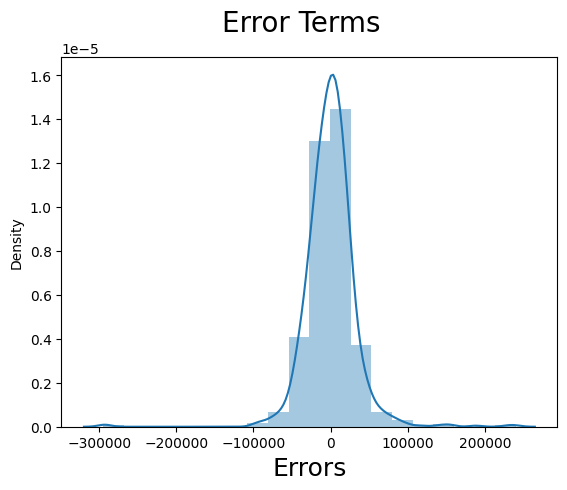

In [145]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


In [146]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.83

In [147]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1100895978623.0242
1078252672.5005128
32836.75794746663


In [148]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

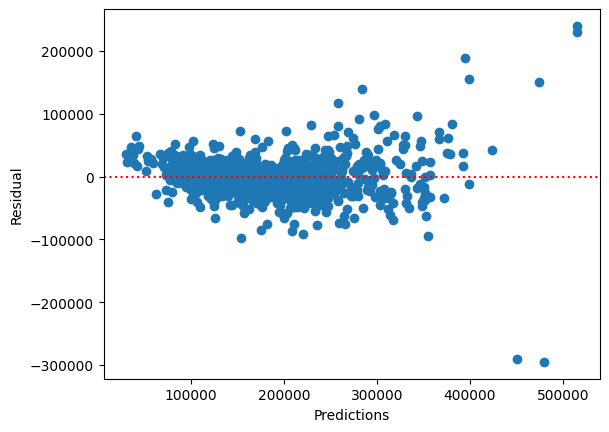

In [149]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [150]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Fa

In [151]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195,0.038505,0.042261,-0.105435,0.001920,0.027773,0.075129,0.049396,0.003095,-0.020822,0.015445,0.042849,-0.018849,-0.067836,-0.054609,0.066047,0.058699,-0.030043,0.039931,181645.895216,0.005526
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,0.935148,0.798998,0.949447,0.844311,0.949066,0.902588,1.009237,1.029982,0.961083,0.956973,0.966692,0.995798,1.014870,0.983782,0.846603,1.024904,1.042020,0.993950,0.973170,0.990890,1.006806,1.026307,1.023814,1.004550,0.887293,0.638820,1.280055,1.477231,0.348993,0.945506,80320.777267,0.991060
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,-0.964030,-0.293313,-1.256903,-2.314361,-2.208049,-2.098584,-0.789230,-0.124502,-2.227567,-0.837450,-0.247791,-2.840982,-0.753316,-3.484694,-4.580922,-2.293993,-2.806960,-0.927153,-0.985354,-4.106758,-2.375841,-2.225247,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.925187,37900.000000,-1.203301
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.688366,-0.542629,-1.181447,-0.680437,-0.789230,-0.124502,-0.747101,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.198233,-1.034916,-0.641156,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,132000.000000,-0.972515
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,-0.187498,-0.293313,-0.142124,-0.172157,-0.154845,-0.202692,-0.789230,-0.124502,-0.116915,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.238898,0.306009,-0.009406,-0.744598,-0.348159,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,165000.000000,-0.049373
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,0.555693,-0.293313,0.546809,0.405345,0.871757,0.434720,0.914249,-0.124502,0.520795,1.066863,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,0.622148,1.206469,0.291653,0.306009,0.490337,0.702136,0.279079,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,213075.000000,0.577044
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,3.742487,6.306447,3.057292,3.186070,0.871757,3.408051,2.861246,11.746585,3.931322,2.971177,8.047130,2.597723,3.242196,3.836032,8.459379,2.259799,3.424626,2.171449,1.754425,0.309238,1.646935,3.658517,5.106640,7.556556,4.668571,7.459033,9.126179,21.324526,4.240389,2.078846,611657.000000,3.247562


In [152]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [155]:
#trained model columns
X_train_new.columns

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new.astype(float)).fit()

#check summary()
test_lm.summary()

# Making predictions
y_pred = lm.predict(X_test_new)

In [156]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.8

In [157]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

563294076515.8138
1283130014.8424015
35820.80421825285


In [158]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

Text(0, 0.5, 'y_pred')

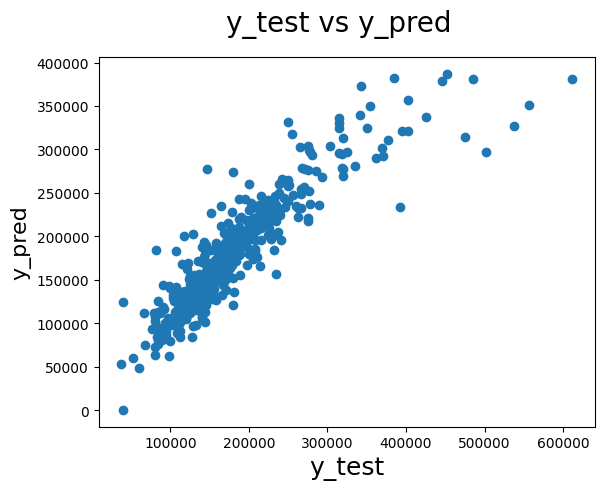

In [160]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [161]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab'], dtype='object')

In [162]:
#final dataframe 
final_df = train_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,6,284,1262,1262,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
2,7,434,920,920,866,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7,540,756,961,756,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,8,490,1145,1145,1053,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


In [163]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.827495967973126
0.8006550359396585
1100895978623.0242
563294076515.8138
1078252672.5005128
1283130014.8424015


In [164]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [165]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [166]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 23743.31158216   9380.7776442   11062.33136527  23363.96252104
  27506.22714442   9201.55310807    692.04438918 -16519.58966749
 -14076.36145541  -4747.2116071  -10902.73518647 -13585.39170498
  -3846.0578691   10185.41960865  18548.11681125  -7709.32454299
  41096.67089323  34364.39452605  10879.01041914   3771.62401533
  20772.1290908   -5981.12730107  -1726.28473     -1585.02638017
   7366.01468469  13360.93817393   7340.48688529 -18647.244692
 -15275.77254486  14307.8297759 ]


In [167]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8229529037128545
0.8072012238658766
1129889162817.0005
544796348720.28394
1106649522.8374147
1240993960.63846


In [168]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [169]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [170]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [171]:
lasso.coef_

array([ 23362.69081261,   9109.81638741,  11149.03411314,  22913.68181228,
        27676.56495994,   8810.31925961,      0.        , -18639.74191248,
       -14527.20698754,     -0.        , -11441.95103418, -15546.25962611,
           -0.        ,  10866.51570086,  23115.86310606,  -7126.61702038,
        52176.39254968,  41038.70056741,  12415.85746778,      0.        ,
        21742.36754845,     -0.        ,     -0.        ,     -0.        ,
         8058.15850957,  15258.86888697,   6085.39145491, -23090.00315259,
       -18390.18889698,  17086.34923244])

In [172]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.8248672554571835
0.8054095690975939
1117672044687.9966
549859072641.5637
1094683687.2556283
1252526361.3703046


In [173]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.274960e-01,8.229529e-01,8.248673e-01
1,R2 Score (Test),8.006550e-01,8.072012e-01,8.054096e-01
2,RSS (Train),1.100896e+12,1.129889e+12,1.117672e+12
3,RSS (Test),5.632941e+11,5.447963e+11,5.498591e+11
4,MSE (Train),3.283676e+04,3.326634e+04,3.308600e+04
5,MSE (Test),3.582080e+04,3.522774e+04,3.539105e+04


In [174]:
betas = pd.DataFrame(index=X.columns)

In [175]:
betas.rows = X.columns

In [176]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [177]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,22037.126243,23743.311582,23362.690813
BsmtQual,9946.198052,9380.777644,9109.816387
BsmtExposure,11473.285935,11062.331365,11149.034113
1stFlrSF,22801.602185,23363.962521,22913.681812
2ndFlrSF,29254.184194,27506.227144,27676.564960
GarageCars,8387.984958,9201.553108,8810.319260
MSSubClass_45,-18694.335076,692.044389,0.000000
MSSubClass_90,-23027.115230,-16519.589667,-18639.741912
MSSubClass_160,-16436.773982,-14076.361455,-14527.206988
MSSubClass_180,-17853.131292,-4747.211607,-0.000000


In [178]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 24461.21638044   9428.68020042  10759.77588373  23706.6977955
  26210.90339648   9673.24245756    654.85384556 -13138.36914679
 -12218.36013472  -2625.69474443  -8236.69384325  -9209.1068203
  -2084.07307073   7602.2766148   13905.10635257  -7081.2752587
  32904.53081939  28254.1673363    7323.14319826   2037.05050549
  18345.76194436  -3198.53059861   -641.64454094   -821.59936077
   4126.22141214   9678.98661845   5602.85248661 -13764.31157692
 -10782.31698736   9689.93454041]
0.8178661173872416
0.8069914107464244


In [179]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 24124.99104682   8490.92088997  11103.19520182  23150.20828709
  26735.26283788   9141.46794367      0.         -14609.88268205
 -12309.20279553     -0.          -7017.90447564  -4579.65030842
     -0.           5903.8737746   18200.58803992  -6019.76995751
  48985.0170056   37764.99488401   4083.27130791      0.
  20485.01076819     -0.             -0.             -0.
      0.           9193.56570796   3280.30635681 -17675.99130288
 -10576.72158733   6853.43782987]
0.8206233743721053
0.8066838843784205


In [180]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [181]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [182]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [183]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [184]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [185]:
lasso.coef_

array([ 23944.78893072,   5258.36575597,  35258.58421958,  22001.77703479,
           -0.        , -16389.40210808,     -0.        ,     -0.        ,
           -0.        ,     -0.        ,      0.        ,      0.        ,
         8719.37420683,  -9131.13547965,     -0.        , -29735.230446  ,
           -0.        ,      0.        ,     -0.        ,     -0.        ,
            0.        ,      0.        ,     -0.        ,     -0.        ,
        17856.72719865])

In [186]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6725202518977313
0.6950172895705873


In [187]:
X_train_new.columns

Index(['BsmtQual', 'BsmtExposure', '1stFlrSF', 'GarageCars', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab'], dtype='object')